In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
filename = 'mimic4_flatfile(1).csv'

data = pd.read_csv(filename)

In [ ]:
data.columns

Index(['Unnamed: 0', 'subject_id', 'hadm_id', 'chartdate', 'icd_code',
       'icd_version', 'dischtime', 'gender', 'anchor_age', 'dod',
       'has_infectous_disease', 'has_sepsis', 'has_diabetes_mellitus_disease',
       'has_blood_disease', 'has_circulatory_disease',
       'has_hypertension_disease', 'has_cerebrovascular_disease', 'CHF',
       'has_respiratory_disease', 'has_atrial_fibrillation_disease', 'CAD',
       'has_stroke_disease'],
      dtype='object')

In [ ]:
data

,Unnamed: 0,subject_id,hadm_id,chartdate,icd_code,icd_version,dischtime,gender,anchor_age,dod,...,has_diabetes_mellitus_disease,has_blood_disease,has_circulatory_disease,has_hypertension_disease,has_cerebrovascular_disease,CHF,has_respiratory_disease,has_atrial_fibrillation_disease,CAD,has_stroke_disease
0,0,10000980,26913865,2189-06-30,3722,9,2189-07-03 03:00:00,F,73,2193-08-26,...,1,0,1,1,0,1,0,0,0,0
1,1,10001492,27463908,2136-09-24,3722,9,2136-09-25 17:45:00,F,71,NaN,...,0,0,1,0,0,0,0,0,0,0
2,2,10002013,21975601,2159-12-16,3722,9,2159-12-17 14:04:00,F,53,NaN,...,1,0,1,1,0,1,1,0,0,0
3,3,10002013,23745275,2157-10-31,3722,9,2157-11-01 13:00:00,F,53,NaN,...,1,0,1,1,0,0,0,0,0,0
4,4,10002013,24760295,2160-07-11,3722,9,2160-07-12 12:30:00,F,53,NaN,...,1,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,9517,19998497,24819607,2139-09-09,3722,9,2139-09-10 15:30:00,F,82,2146-02-24,...,1,1,1,1,0,1,0,0,0,0
9518,9518,19998497,26439709,2140-04-27,3722,9,2140-04-28 15:56:00,F,82,2146-02-24,...,1,0,1,1,0,0,0,0,0,0
9519,9519,19998497,28129567,2145-02-26,3723,9,2145-02-28 12:06:00,F,82,2146-02-24,...,1,1,1,1,0,0,1,0,0,0
9520,9520,19998497,28279282,2140-01-02,3722,9,2140-01-03 13:20:00,F,82,2146-02-24,...,1,1,1,1,0,0,0,0,0,0


In [ ]:
prediction_vars = ['subject_id', 'hadm_id', 'gender', 'anchor_age','has_infectous_disease', 'has_sepsis', 'has_diabetes_mellitus_disease', 'has_blood_disease',
       'has_circulatory_disease', 'has_hypertension_disease',
       'has_cerebrovascular_disease', 'has_atrial_fibrillation_disease','CHF',
       'has_respiratory_disease', 'CAD']
target_variable = ["has_stroke_disease"]
data_new = data[prediction_vars + target_variable]

In [ ]:
data_new.shape

(9522, 16)

In [ ]:
!pip install sweetviz
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv
from pandas_profiling import ProfileReport

my_total_report = sv.analyze(data_new, target_feat ='has_stroke_disease', pairwise_analysis = "on")
my_total_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data_processed = data_new.copy()

In [ ]:
# Drop all duplicates
data_processed = data_processed.drop_duplicates(subset = ['subject_id'])
data_processed.shape

(7745, 16)

In [ ]:
data_processed

,subject_id,hadm_id,gender,anchor_age,has_infectous_disease,has_sepsis,has_diabetes_mellitus_disease,has_blood_disease,has_circulatory_disease,has_hypertension_disease,has_cerebrovascular_disease,has_atrial_fibrillation_disease,CHF,has_respiratory_disease,CAD,has_stroke_disease
0,10000980,26913865,F,73,0,0,1,0,1,1,0,0,1,0,0,0
1,10001492,27463908,F,71,0,0,0,0,1,0,0,0,0,0,0,0
2,10002013,21975601,F,53,0,0,1,0,1,1,0,0,1,1,0,0
5,10002155,23822395,F,80,0,0,0,1,1,1,0,0,1,1,0,0
6,10004422,21255400,M,78,0,0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,19992875,29961782,M,37,0,0,0,1,1,0,0,0,0,0,0,0
9513,19994505,22534556,M,80,0,0,1,0,1,1,0,0,1,0,0,0
9514,19995780,21942461,M,84,0,0,0,1,1,1,0,1,0,1,0,0
9515,19997367,20617667,F,63,1,1,0,1,1,0,0,0,0,1,0,0


In [ ]:
# Checking for missing values
for variable in data_processed:
  print(data_processed[variable].unique())

[10000980 10001492 10002013 ... 19995780 19997367 19998497]
[26913865 27463908 21975601 ... 21942461 20617667 24819607]
['F' 'M']
[73 71 53 80 78 65 76 50 44 54 79 69 63 72 59 68 47 48 87 82 77 74 62 70
 75 67 85 83 60 61 46 91 49 64 57 40 55 51 58 56 66 88 89 39 81 84 31 86
 42 52 45 38 41 43 33 27 20 34 37 28 24 36 30 32 35 22 25 19 29 26 18]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0]
[0 1]


In [ ]:
data_processed.isna().sum()

subject_id                         0
hadm_id                            0
gender                             0
anchor_age                         0
has_infectous_disease              0
has_sepsis                         0
has_diabetes_mellitus_disease      0
has_blood_disease                  0
has_circulatory_disease            0
has_hypertension_disease           0
has_cerebrovascular_disease        0
has_atrial_fibrillation_disease    0
CHF                                0
has_respiratory_disease            0
CAD                                0
has_stroke_disease                 0
dtype: int64

In [ ]:
data_processed.shape

(7745, 16)

In [ ]:
data_processed['gender'] = data_processed['gender'].replace(['F','M'],[0,1])
data_processed['gender']

0       0
1       0
2       0
5       0
6       1
       ..
9512    1
9513    1
9514    1
9515    0
9517    0
Name: gender, Length: 7745, dtype: int64

In [ ]:
data_processed
predicted=['gender', 'anchor_age','has_infectous_disease', 'has_sepsis', 'has_diabetes_mellitus_disease', 'has_blood_disease',
       'has_circulatory_disease', 'has_hypertension_disease',
       'has_cerebrovascular_disease', 'has_atrial_fibrillation_disease','CHF',
       'has_respiratory_disease', 'CAD']
predicted_stroke = ['has_stroke_disease']
predicted_with_stroke = data_processed[predicted+predicted_stroke]
predicted_with_stroke.shape

(7745, 14)

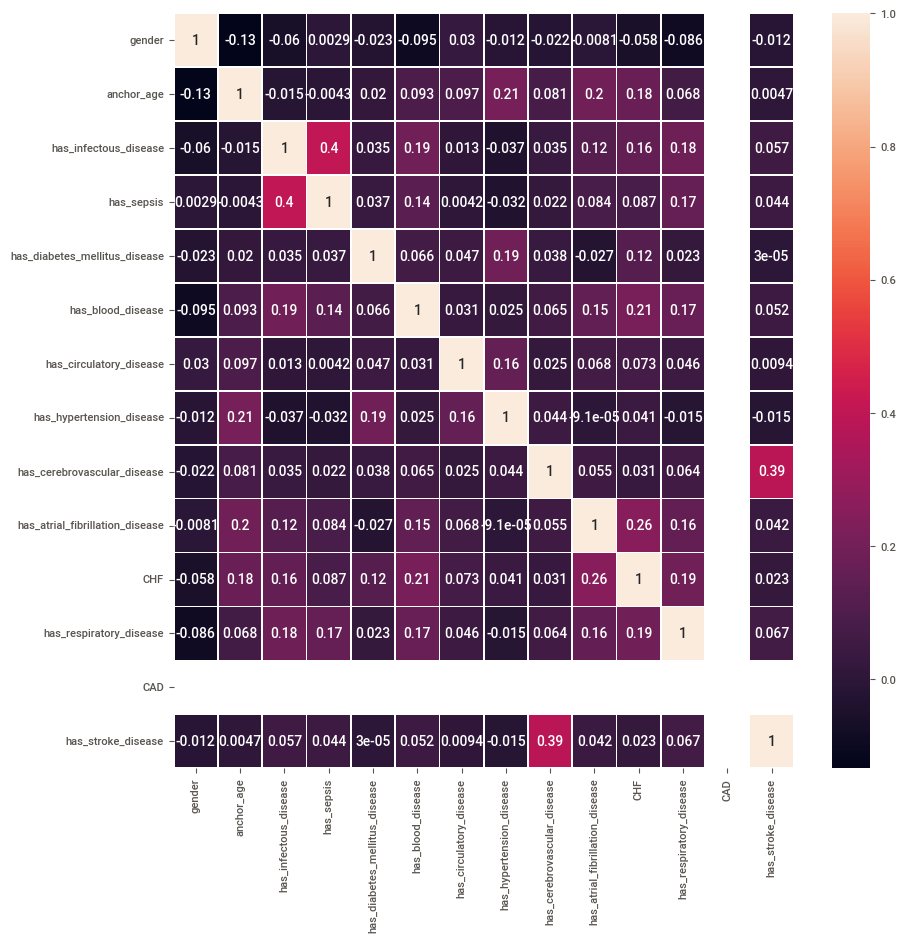

In [ ]:
# Plot the correlation between all variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(predicted_with_stroke.corr(),annot=True,linewidths=.5, ax=ax)


In [ ]:
predicted_with_stroke['has_stroke_disease'].value_counts()

0    7663
1      82
Name: has_stroke_disease, dtype: int64

In [ ]:
y = predicted_with_stroke["has_stroke_disease"]

In [ ]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_processed[predicted], y, test_size=0.3, random_state=0, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())
print('Train size:',X_train.shape)
print('Test size:',X_test.shape)



0    5364
1      57
Name: has_stroke_disease, dtype: int64
0    2299
1      25
Name: has_stroke_disease, dtype: int64
Train size: (5421, 13)
Test size: (2324, 13)


In [ ]:
# Fit a classification model and predict y :
from sklearn.svm import SVC
model = SVC(probability=True) # Set up the model (svc)
model.fit(X_train, y_train) # Fit the model on train data
y_predicted = model.predict(X_test) # Predict y from X using the trained model

In [ ]:
print(y_test.value_counts())
print(y_predicted)

0    2299
1      25
Name: has_stroke_disease, dtype: int64
[0 0 0 ... 0 0 0]


In [ ]:
# Evaluate performance:
from sklearn.metrics import accuracy_score
total_accuracy = accuracy_score(y_test, y_predicted)
print('total accuracy on test data: {0:.2%}'.format(total_accuracy)) # this is how you pretty-print percentage

total accuracy on test data: 98.92%


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted, target_names=['no stroke', 'has stroke']))

              precision    recall  f1-score   support

   no stroke       0.99      1.00      0.99      2299
  has stroke       0.00      0.00      0.00        25

    accuracy                           0.99      2324
   macro avg       0.49      0.50      0.50      2324
weighted avg       0.98      0.99      0.98      2324



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Predicted=0,Predicted=1
True=0,2299,0
True=1,25,0


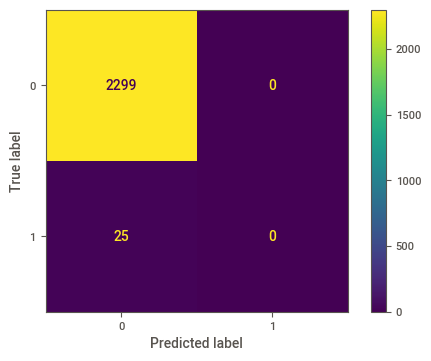

In [ ]:
# Print a confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm
cm_df = pd.DataFrame(cm, index=['True=0', 'True=1'], columns=['Predicted=0', 'Predicted=1']) #convert to dataframe
display(cm_df)

# User built-in sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()


In [ ]:
#at this point we try to crate new data with smaller propersion between 0,1
our_new_data=predicted_with_stroke.loc[predicted_with_stroke['has_stroke_disease']==1]
our_new_data.shape

(82, 14)

In [ ]:
our_zeros=predicted_with_stroke.loc[predicted_with_stroke['has_stroke_disease']==0]
random_zeros=our_zeros.sample(n=720)
random_zeros.shape

(720, 14)

In [ ]:
list_df=[our_new_data,random_zeros]
total_new=pd.concat(list_df)
total_new.shape

(802, 14)

In [ ]:
y_new=total_new['has_stroke_disease']
print(y_new)

335     1
402     1
470     1
587     1
609     1
       ..
1536    0
8210    0
4469    0
1091    0
4246    0
Name: has_stroke_disease, Length: 802, dtype: int64


In [ ]:
# Sperate train and test new data
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(total_new[predicted],y_new, test_size=0.3, random_state=0,stratify=y_new)
print('Train size:',X_train_new.shape)
print('Test size:',X_test_new.shape)
print(y_test_new.value_counts)


Train size: (561, 13)
Test size: (241, 13)
<bound method IndexOpsMixin.value_counts of 8307    0
8505    0
7051    0
7590    0
8734    0
       ..
7602    0
3144    0
8186    0
5629    0
6676    0
Name: has_stroke_disease, Length: 241, dtype: int64>


In [ ]:
# Fit a classification model and predict y :
from sklearn.svm import SVC
model = SVC(probability=True) # Set up the model (svc)
model.fit(X_train_new, y_train_new) # Fit the model on train data
y_predicted_new = model.predict(X_test_new) # Predict y from X using the trained model

In [ ]:
# Evaluate performance:
from sklearn.metrics import accuracy_score
total_accuracy_new = accuracy_score(y_test_new, y_predicted_new)
print('total accuracy on test data: {0:.3%}'.format(total_accuracy_new)) # this is how you pretty-print percentage

total accuracy on test data: 89.627%


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_predicted_new, target_names=['no stroke', 'has stroke']))

              precision    recall  f1-score   support

   no stroke       0.90      1.00      0.95       216
  has stroke       0.00      0.00      0.00        25

    accuracy                           0.90       241
   macro avg       0.45      0.50      0.47       241
weighted avg       0.80      0.90      0.85       241



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Predicted=0,Predicted=1
True=0,216,0
True=1,25,0


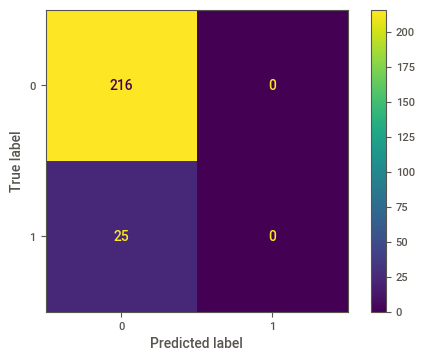

In [ ]:
# Print a confusion matrix:
from sklearn.metrics import confusion_matrix
cm_new = confusion_matrix(y_test_new,y_predicted_new)
cm_new
cm_df_new = pd.DataFrame(cm_new, index=['True=0', 'True=1'], columns=['Predicted=0', 'Predicted=1']) #convert to dataframe
display(cm_df_new)
# User built-in sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
cm_new_display = ConfusionMatrixDisplay(cm_new).plot()

total accuracy on test data: 89.63%
              precision    recall  f1-score   support

   no stroke       0.93      0.95      0.94       216
  has stroke       0.50      0.40      0.44        25

    accuracy                           0.90       241
   macro avg       0.72      0.68      0.69       241
weighted avg       0.89      0.90      0.89       241



,Predicted=0,Predicted=1
True=0,206,10
True=1,15,10


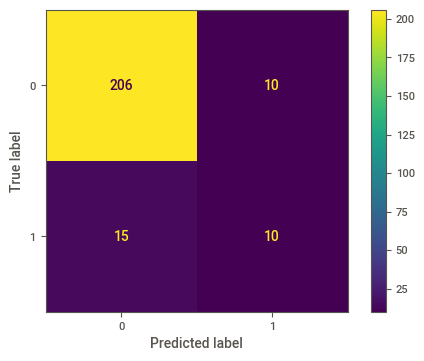

In [ ]:
#try random forest for small one

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model2 = RandomForestClassifier(n_estimators=2)
model2.fit(X_train_new, y_train_new)
# y_pred_proba2 = model2.predict_proba(X_test_new)[::,1]
# pr2, tpr2, _ = metrics.roc_curve(y_test_new,  y_pred_proba2)
# auc2 = metrics.roc_auc_score(y_test_new, y_pred_proba2)
# plt.plot(fpr2,tpr2, label=str(model2))
# plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate");
# f=plt.legend()

# print(f'{model2}: AUC={round(auc2,4)}\n') # you can write "f" at the begin
# for res in y_pred_proba2:
#   if res<=0.5:
#     res=0
#   else:
#     res=1
# print(y_pred_proba2)

 # Fit the model on train data
y_predicted_new = model2.predict(X_test_new)

# Evaluate performance:
from sklearn.metrics import accuracy_score
total_accuracy_model2 = accuracy_score(y_test_new, y_predicted_new)
print('total accuracy on test data: {0:.2%}'.format(total_accuracy_new))

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_predicted_new, target_names=['no stroke', 'has stroke']))

# Print a confusion matrix:
from sklearn.metrics import confusion_matrix
cm_Random = confusion_matrix(y_test_new,y_predicted_new)
cm_Random
cm_df_Random = pd.DataFrame(cm_Random, index=['True=0', 'True=1'], columns=['Predicted=0', 'Predicted=1']) #convert to dataframe
display(cm_df_Random)
# User built-in sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
cm_new_display = ConfusionMatrixDisplay(cm_Random).plot()

In [ ]:
#logistic regression - for 1:9
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression(solver='liblinear')
model.fit(X_train_new, y_train_new) # Fit the model on train data
y_predicted_new = model.predict(X_test_new) # Predict y from X using the trained model

In [ ]:
# Evaluate performance:
from sklearn.metrics import accuracy_score
total_accuracy_new = accuracy_score(y_test_new, y_predicted_new)
print('total accuracy on test data: {0:.3%}'.format(total_accuracy_new)) # this is how you pretty-print percentage

total accuracy on test data: 93.776%


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_predicted_new, target_names=['no stroke', 'has stroke']))


              precision    recall  f1-score   support

   no stroke       0.97      0.96      0.97       216
  has stroke       0.69      0.72      0.71        25

    accuracy                           0.94       241
   macro avg       0.83      0.84      0.84       241
weighted avg       0.94      0.94      0.94       241



,Predicted=0,Predicted=1
True=0,208,8
True=1,7,18


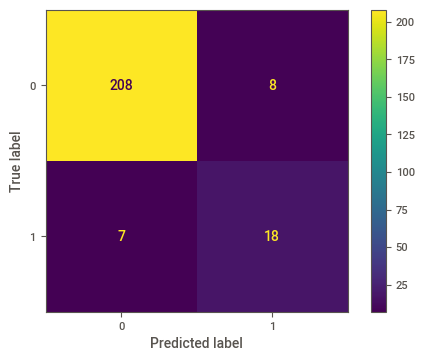

In [ ]:
# Print a confusion matrix:
from sklearn.metrics import confusion_matrix
cm_new = confusion_matrix(y_test_new,y_predicted_new)
cm_new
cm_df_new = pd.DataFrame(cm_new, index=['True=0', 'True=1'], columns=['Predicted=0', 'Predicted=1']) #convert to dataframe
display(cm_df_new)
# User built-in sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
cm_new_display = ConfusionMatrixDisplay(cm_new).plot()

In [ ]:
our_zeros_smaller=predicted_with_stroke.loc[predicted_with_stroke['has_stroke_disease']==0]
random_zeros_smaller=our_zeros.sample(n=160)
random_zeros_smaller.shape

(160, 14)

In [ ]:
list_df_small=[our_new_data,random_zeros_smaller]
total_new_smaller=pd.concat(list_df_small)
total_new_smaller.shape

(242, 14)

In [ ]:
y_new_smaller=total_new_smaller['has_stroke_disease']

In [ ]:
# Sperate train and test new data to 1:3
from sklearn.model_selection import train_test_split
X_train_smaller, X_test_smaller, y_train_smaller, y_test_smaller = train_test_split(total_new_smaller[predicted],y_new_smaller, test_size=0.3, random_state=0,stratify=y_new_smaller)
print('Train size:',X_train_smaller.shape)
print('Test size:',X_test_smaller.shape)
print(y_test_smaller.value_counts)

Train size: (169, 13)
Test size: (73, 13)
<bound method IndexOpsMixin.value_counts of 372     0
9345    0
4561    0
5754    1
587     1
       ..
6100    0
3708    1
3632    0
2602    0
6812    1
Name: has_stroke_disease, Length: 73, dtype: int64>


In [ ]:
#logistic rgression
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression(solver='liblinear')
model.fit(X_train_smaller, y_train_smaller) # Fit the model on train data
y_predicted_smaller = model.predict(X_test_smaller) # Predict y from X using the trained model

In [ ]:
# Evaluate performance:
from sklearn.metrics import accuracy_score
total_accuracy_smaller = accuracy_score(y_test_smaller, y_predicted_smaller)
print('total accuracy on test data: {0:.3%}'.format(total_accuracy_smaller)) # this is how you pretty-print percentage

total accuracy on test data: 97.260%


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_smaller, y_predicted_smaller, target_names=['no stroke', 'has stroke']))


              precision    recall  f1-score   support

   no stroke       1.00      0.96      0.98        48
  has stroke       0.93      1.00      0.96        25

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



,Predicted=0,Predicted=1
True=0,46,2
True=1,0,25


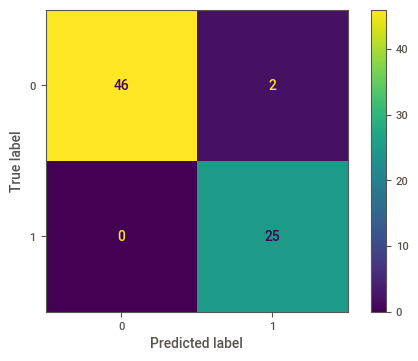

In [ ]:
# Print a confusion matrix:
from sklearn.metrics import confusion_matrix
cm_small = confusion_matrix(y_test_smaller,y_predicted_smaller)
cm_small
cm_df_small = pd.DataFrame(cm_small, index=['True=0', 'True=1'], columns=['Predicted=0', 'Predicted=1']) #convert to dataframe
display(cm_df_small)
# User built-in sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
cm_small_display = ConfusionMatrixDisplay(cm_small).plot()